# Pymaceuticals Inc.
---

### Analysis
Analysis: The analysis of the correlation coefficient and the linear regression model can provide valuable insights into the relationship between mouse weight and tumor volume in response to the Capomulin regimen. A positive correlation and a significant slope of the regression line suggest that heavier mice tend to have larger tumor volumes, indicating a potential association between weight and tumor growth under this treatment regimen. However, further investigation, including experimental design and additional factors, may be necessary to establish causality and fully understand the relationship between these variables.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [27]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"There are {num_mice} mice in the dataset.")

There are 249 mice in the dataset.


In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

print("Duplicate mice by ID number that show up for Mouse ID and Timepoint:")
print(duplicate_mouse_ids)

Duplicate mice by ID number that show up for Mouse ID and Timepoint:
['g989']


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

print("Data for the duplicate mouse IDs:")
print(duplicate_mouse_data)


Data for the duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fem

In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

# Verify the clean DataFrame
print(clean_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [31]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print(f"There are {num_mice_clean} mice in the clean DataFrame.")

There are 249 mice in the clean DataFrame.


## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_grouped = clean_data.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM of tumor volume for each regimen
summary_stats = regimen_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Renaming columns for clarity
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume SEM"})

# Displaying the summary statistics table
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method to produce the summary statistics in a single line
summary_stats_advanced = regimen_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats_advanced = summary_stats_advanced.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume SEM"})

# Displaying the summary statistics table
print(summary_stats_advanced)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

## Bar and Pie Charts

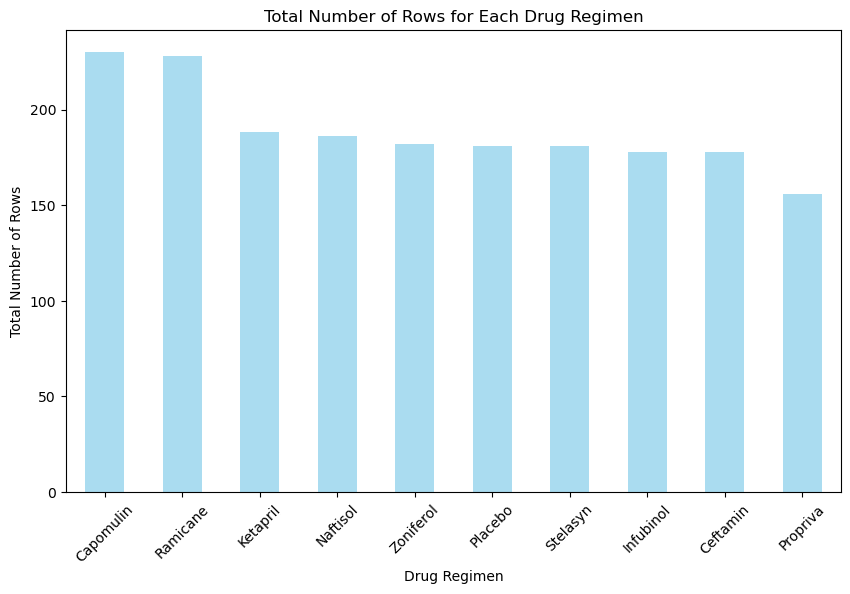

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = clean_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", figsize=(10, 6), color='skyblue', alpha=0.7)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)
plt.show()

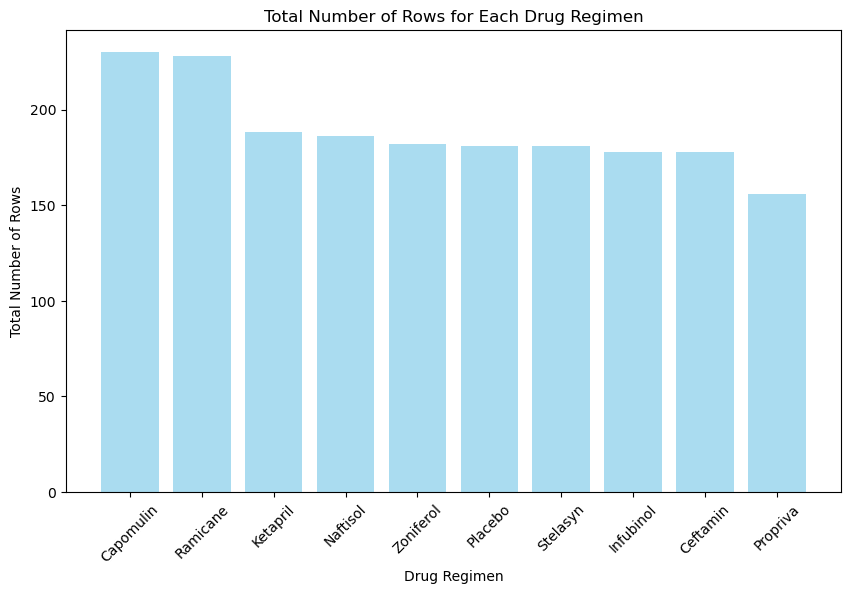

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = clean_data["Drug Regimen"].value_counts()
regimen_names = drug_regimen_counts.index
regimen_counts = drug_regimen_counts.values
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, regimen_counts, color='skyblue', alpha=0.7)
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)
plt.show()


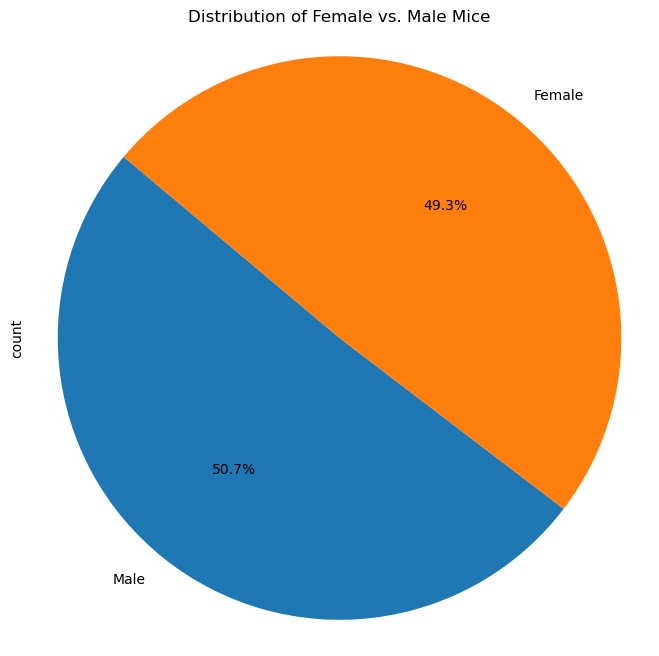

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, figsize=(8, 8))
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.show()

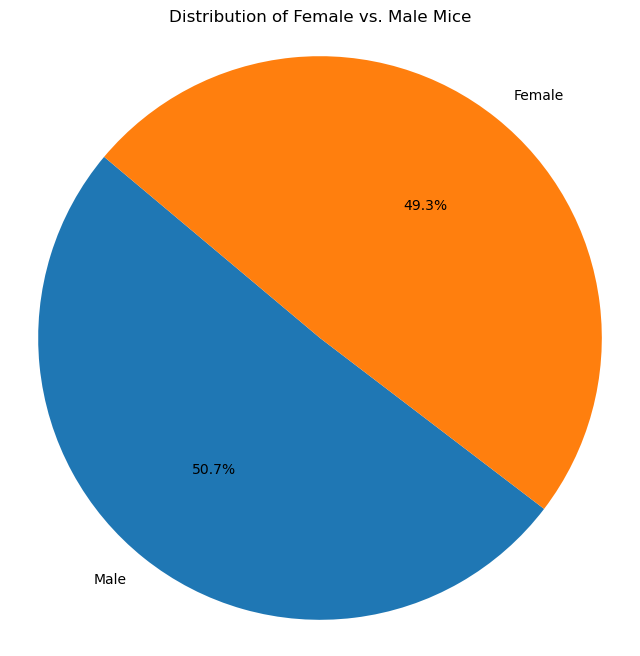

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data["Sex"].value_counts()
gender_labels = gender_distribution.index
gender_counts = gender_distribution.values
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_per_mouse = clean_data.groupby("Mouse ID")["Timepoint"].max()
final_tumor_volume = pd.merge(last_timepoint_per_mouse, clean_data, on=["Mouse ID", "Timepoint"], how="inner")
specified_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_specified_regimens = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(specified_regimens)]
print(final_tumor_volume_specified_regimens)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [39]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_data = []
for treatment in treatments:
    tumor_volumes = final_tumor_volume_specified_regimens.loc[final_tumor_volume_specified_regimens["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volumes)
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"--- {treatment} ---")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")


--- Capomulin ---
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Ramicane ---
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

--- Infubinol ---
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

--- Ceftamin ---
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



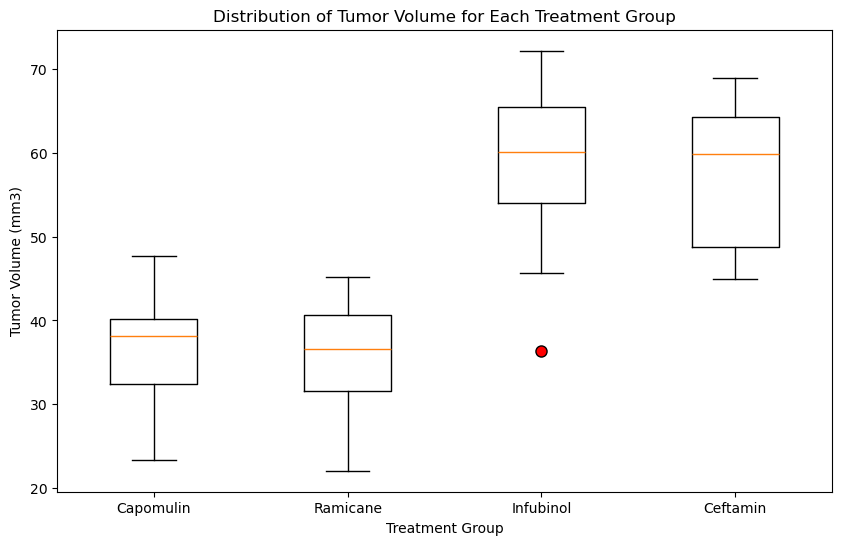

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

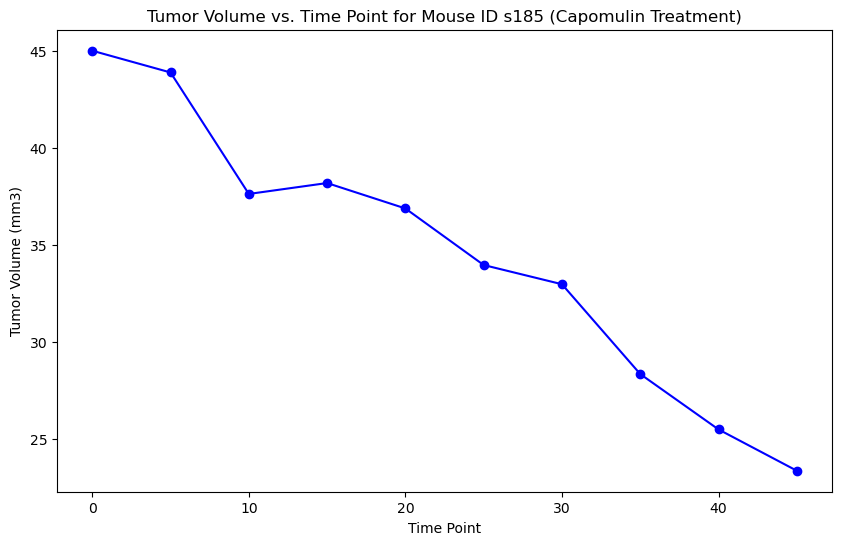

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
single_mouse_id = "s185"  
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == single_mouse_id]
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o', color='blue')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {single_mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


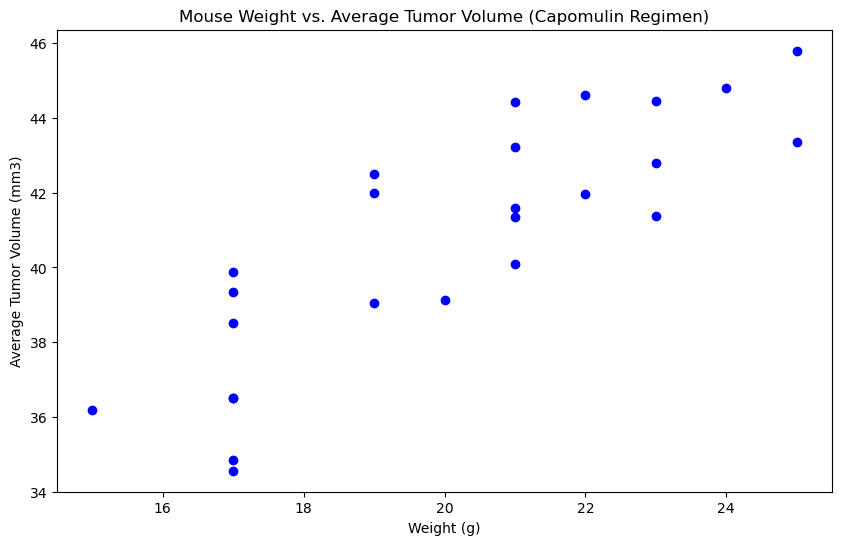

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume_per_mouse = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume_df = pd.DataFrame({"Average Tumor Volume (mm3)": average_tumor_volume_per_mouse})
merged_data = pd.merge(mouse_metadata, average_tumor_volume_df, on="Mouse ID", how="inner")
capomulin_weight_vs_tumor_volume = merged_data[merged_data["Drug Regimen"] == "Capomulin"]
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_vs_tumor_volume["Weight (g)"], capomulin_weight_vs_tumor_volume["Average Tumor Volume (mm3)"], color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694719


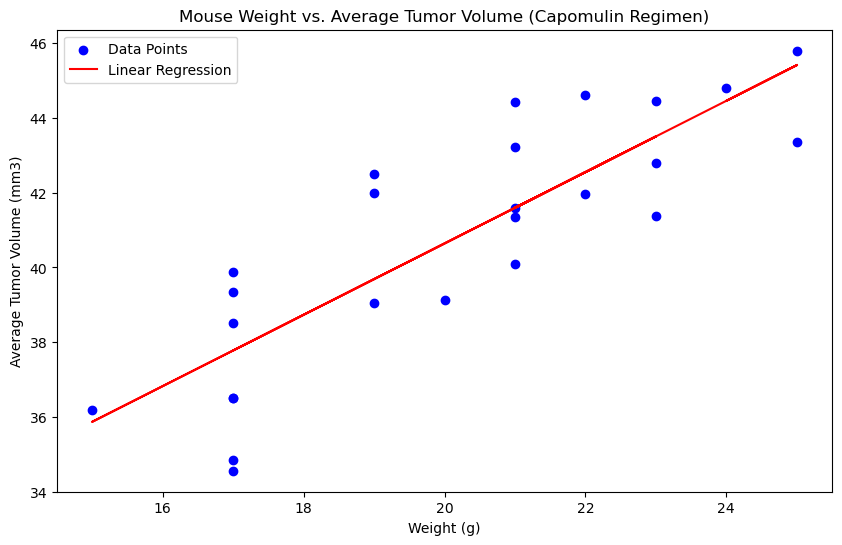

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress
correlation_coefficient, _ = pearsonr(capomulin_weight_vs_tumor_volume["Weight (g)"], capomulin_weight_vs_tumor_volume["Average Tumor Volume (mm3)"])
print(f"Correlation Coefficient: {correlation_coefficient}")
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_weight_vs_tumor_volume["Weight (g)"], capomulin_weight_vs_tumor_volume["Average Tumor Volume (mm3)"])
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_vs_tumor_volume["Weight (g)"], capomulin_weight_vs_tumor_volume["Average Tumor Volume (mm3)"], color='blue', label="Data Points")
plt.plot(capomulin_weight_vs_tumor_volume["Weight (g)"], slope * capomulin_weight_vs_tumor_volume["Weight (g)"] + intercept, color='red', label="Linear Regression")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()
